In [2]:
%matplotlib inline


# Linear Regression Example

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients and the residual sum of squares are also calculated.


In [3]:
print(__doc__)

# Code source adapted from: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Print the diabetes dimension
print("Diabetes dataset dimensions:", diabetes.data.shape)
print()

# Print the diabetes data (features and target)
diabetes_features_df = pd.DataFrame(diabetes.data)
print(diabetes_features_df)
diabetes_target_df = pd.DataFrame(diabetes.target)
print(diabetes_target_df)

Automatically created module for IPython interactive environment
Diabetes dataset dimensions: (442, 10)

            0         1         2         3         4         5         6  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6   -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7    0.063504  0.050680 -0.001895  0.066630  0.090620  0.108914  0.022869   
8    0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9   -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508 -0.024993   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.1

In [4]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Use all features
#diabetes_X = diabetes.data 

diabetes_X_df = pd.DataFrame(diabetes_X)
#print(diabetes_X_df)

# Split the data into training/validation sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_validation = diabetes_X[-20:]

# Print the diabetes train dimension
print("Diabetes X train dimension:", diabetes_X_train.data.shape)

# Print the diabetes validation dimension
print("Diabetes X validation dimension:", diabetes_X_validation.data.shape)
print()

#diabetes_X_train_df = pd.DataFrame(diabetes_X_train)
#diabetes_X_validation_df = pd.DataFrame(diabetes_X_validation)
#print(diabetes_X_train_df)
#print(diabetes_X_validation_df)

# Split the targets into training/validation sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_validation = diabetes.target[-20:]

# Print the diabetes train dimension
print("Diabetes y train dimension:", diabetes_y_train.data.shape)

# Print the diabetes validation dimension
print("Diabetes y validation dimension:", diabetes_y_validation.data.shape)
print()

#diabetes_y_train_df = pd.DataFrame(diabetes_y_train)
#diabetes_y_validation_df = pd.DataFrame(diabetes_y_validation)
#print(diabetes_y_train_df)
#print(diabetes_y_validation_df)


Diabetes X train dimension: (422, 1)
Diabetes X validation dimension: (20, 1)

Diabetes y train dimension: (422,)
Diabetes y validation dimension: (20,)



In [5]:
# Create linear regression object
#regr = linear_model.LinearRegression()

# Train the model using the training sets
#regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the validation set
#diabetes_y_pred = regr.predict(diabetes_X_validation)

# Print predictions 
#print(diabetes_y_pred)

In [6]:
# Create linear regression object
regr = linear_model.SGDRegressor(max_iter=10000, eta0=0.001)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the validation set
diabetes_y_pred = regr.predict(diabetes_X_validation)

# Print predictions 
print(diabetes_y_pred)

[171.05765513 144.19806593 155.77972366 143.95164768 145.43015717
 154.54763241 173.52183763 145.67657542 140.25537393 146.16941192
 165.88287189 139.51611918 153.56195941 147.89433967 136.31268194
 157.75106965 149.61926742 149.61926742 162.18659815 136.55910019]


Coefficients: 
 [228.6282141]
Intercept: 
 [153.25588787]
Mean squared error: 4472.62


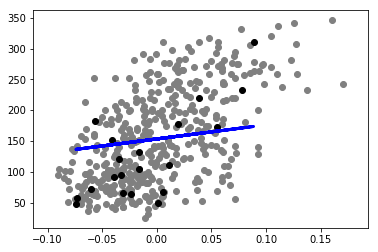

In [7]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_validation, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train, color='gray')
plt.scatter(diabetes_X_validation, diabetes_y_validation, color='black')
plt.plot(diabetes_X_validation, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.show()